# Dog breed multi-class classifier

> Building a multi class image classifier with tensorflow.

## Problem

> Identifying a breed of a dog given an image of a dog.

## Data

> Since this problem is based around unstructured data, the solution would be to use deep learning/transfer learning, the data can be found [here](https://www.kaggle.com/c/dog-breed-identification/data?select=sample_submission.csv).

In [45]:
%load_ext tensorboard
import datetime
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np


#tensorflow version
print(f'Tensorflow version: {tf.__version__}')
#check for GPU
print(f'GPU count: {len(tf.config.list_physical_devices("GPU"))}')

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Tensorflow version: 2.4.1
GPU count: 1


In [2]:
#access data(images)
#check labels of data
import pandas as pd
labels_csv = pd.read_csv('./dog_data/labels.csv')
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [3]:
#info
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


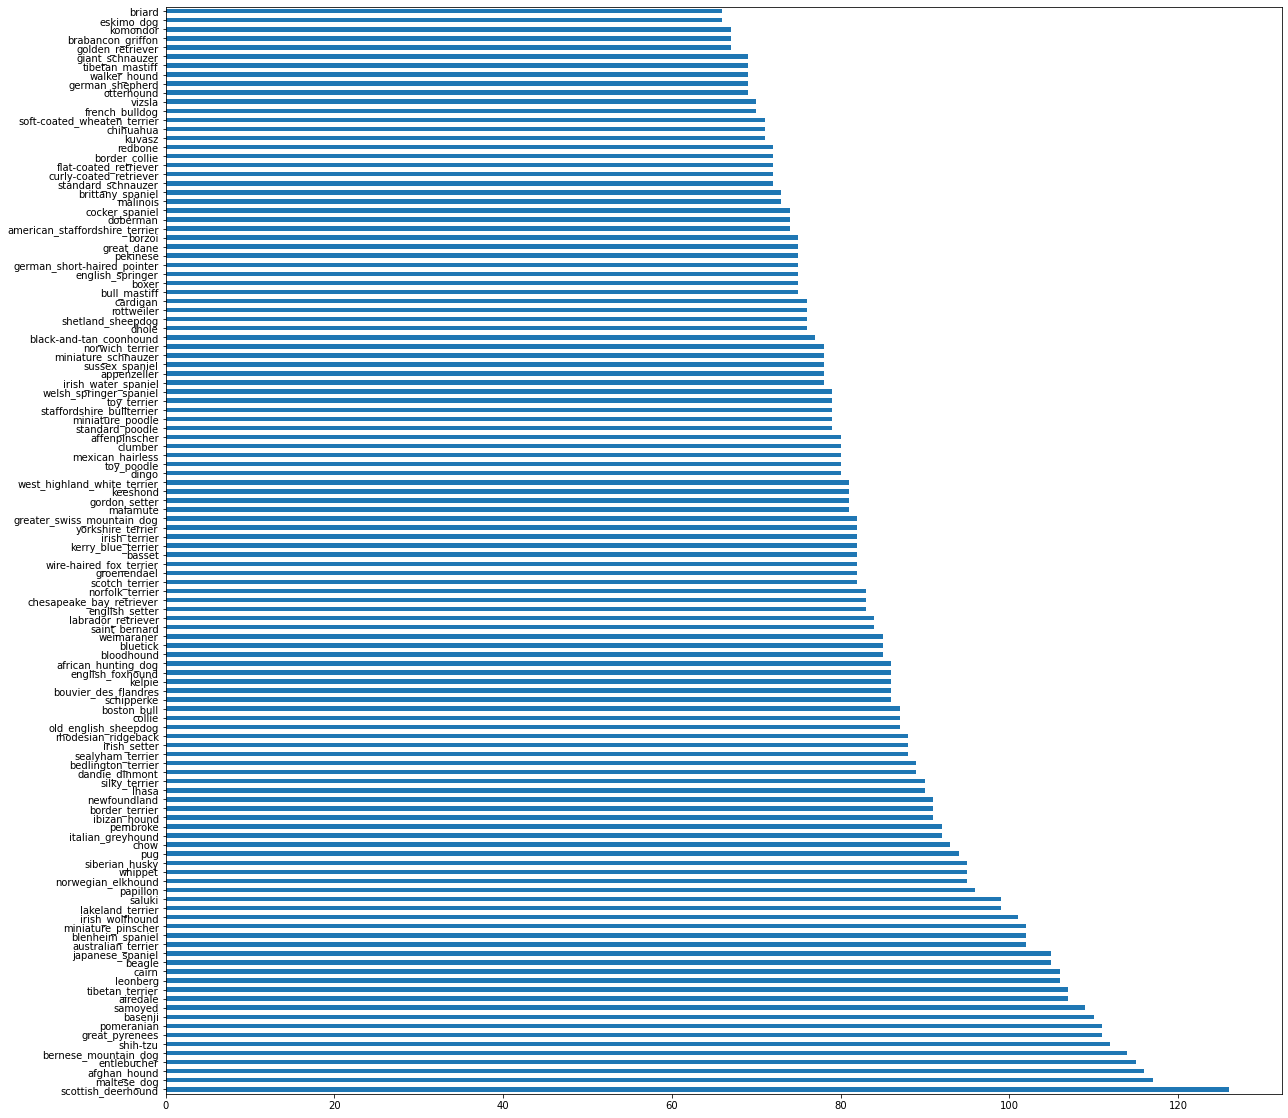

In [4]:
#how many images of each breed
labels_csv.breed.value_counts().plot(figsize=(20, 20), kind='barh');

In [5]:
labels_csv.breed.value_counts().median()

82.0

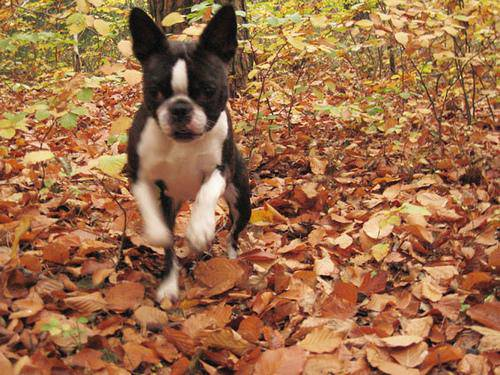

In [6]:
#preparing images
from IPython.display import Image
Image('./dog_data/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [7]:
#getting images and their labels
#create pathnames from image id's
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [8]:
#get correct filepath to images
train_filepaths = ["./dog_data/train/"+fname for fname in labels_csv['id']+".jpg"];
train_filepaths[:10]

['./dog_data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 './dog_data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 './dog_data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 './dog_data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 './dog_data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 './dog_data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 './dog_data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 './dog_data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 './dog_data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 './dog_data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [9]:
#check if number of filenames matches number of actual image files
import os

if len(os.listdir('./dog_data/train/')) == len(train_filepaths):
    print('continue')
else:
    print('review data')

continue


In [10]:
#prepare our labels(change breed column into numpy array)
labels = labels_csv['breed'].to_numpy()
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [11]:
#check if number of labels = number of files
if len(labels) == len(train_filepaths):
    print('continue')
else:
    print('review data')

continue


In [12]:
#find unique labels
unique_labels = np.unique(labels)
len(unique_labels), labels_csv['breed'].describe()

(120,
 count                  10222
 unique                   120
 top       scottish_deerhound
 freq                     126
 Name: breed, dtype: object)

In [13]:
#convert each label to boolean array(which makes it unique) then one-hot encode them 
boolean_labels = [label == unique_labels for label in labels]
boolean_labels[:1] #one label

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False])]

In [14]:
#creating validation set
X = train_filepaths
y = boolean_labels

In [15]:
#start with a 1000 samples(images)

In [16]:
#set number of images to use for experiment
NUM_IMAGES = 1000

In [17]:
#split data into train and validation
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], 
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [18]:
X_train[:2], y_train[:2]

(['./dog_data/train/00bee065dcec471f26394855c5c2f3de.jpg',
  './dog_data/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, F

In [19]:
#turning data into tensors
IMG_SIZE = 224

def process_img(img_path):
    image = tf.io.read_file(img_path) #sets tensor as string
    image = tf.image.decode_jpeg(image, channels=3) #decode image numbers
    image = tf.image.convert_image_dtype(image, tf.float32) # normalize image
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE]) #resize image
    return image
    

In [44]:
process_img(X[0])

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.5705322 , 0.33588538, 0.15008473],
        [0.66901225, 0.4601166 , 0.26022965],
        [0.61062384, 0.43763596, 0.21601713],
        ...,
        [0.8182312 , 0.7297958 , 0.26963907],
        [0.72454786, 0.6059109 , 0.2653059 ],
        [0.7494603 , 0.6252918 , 0.32456532]],

       [[0.6761415 , 0.4733761 , 0.30642927],
        [0.5672121 , 0.38192675, 0.20349538],
        [0.5883547 , 0.4322571 , 0.2403155 ],
        ...,
        [0.9326942 , 0.8260503 , 0.41093278],
        [0.86072475, 0.74250627, 0.3694122 ],
        [0.76781666, 0.6461604 , 0.29291284]],

       [[0.46350825, 0.29595745, 0.1536156 ],
        [0.42554107, 0.27039403, 0.12009468],
        [0.7887875 , 0.6547362 , 0.49015   ],
        ...,
        [0.89372385, 0.7696401 , 0.41811958],
        [0.88609535, 0.7585918 , 0.36495727],
        [0.8243601 , 0.69494826, 0.2930575 ]],

       ...,

       [[0.7344025 , 0.4716574 , 0.2559711 ],
        [0.71

In [21]:
#return tuple of image and label
def get_image_label(image_path, label):
    image = process_img(image_path)
    return image, label

In [22]:
get_image_label(X[42], y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [23]:
#turn all data into batches
BATCH_SIZE = 32
def create_data_batches(X, y=None,batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    if test_data:
        print('Creating test data batches...')
        data = tf.data.Dataset.from_tensor_slices(tf.constant(X))
        data_batch = data.map(process_image).batch(batch_size)
        print('Done')
        return data_batch
    
    if valid_data:
        print('Creating validation data batches...')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        data_batch = data.map(get_image_label).batch(batch_size)
        print('Done')
        return data_batch
    
    if not valid_data and not test_data:
        print('Creating training data batches...')
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        data = data.shuffle(buffer_size=len(X))
        data = data.map(get_image_label)
        data_batch = data.batch(batch_size)
        print('Done')
        return data_batch
        

In [24]:
# create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Done
Creating validation data batches...
Done


In [25]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [26]:
#visualize data batches
import matplotlib.pyplot as plt

def show_25_images(images, labels):
    plt.figure(figsize=(10,10))
    for image in range(25):
        ax = plt.subplot(5, 5, image+1)
        plt.imshow(images[image])
        plt.title(unique_labels[labels[image].argmax()])
        plt.axis('off')

In [43]:
train_images, train_labels = next(train_data.as_numpy_iterator())

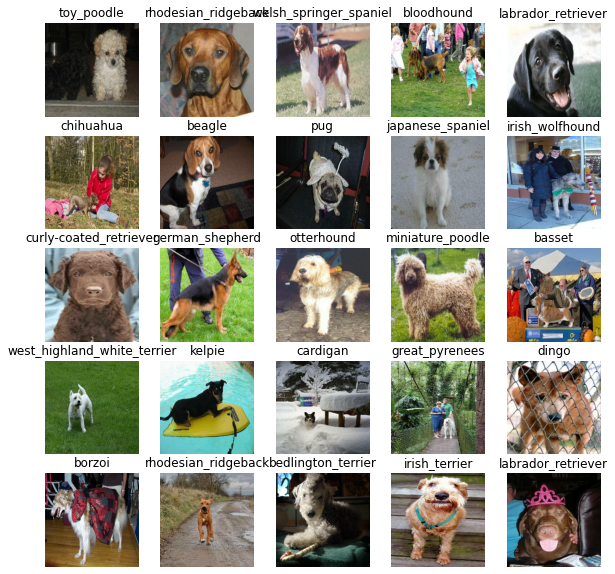

In [28]:
show_25_images(train_images, train_labels)

In [29]:
# inputs and outputs
train_data, val_data

(<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>,
 <BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>)

In [30]:
#building a model

INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channel
OUTPUT_SHAPE = len(unique_labels)

MODEL_URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

In [31]:
#create keras deep learning model
def create_sequential_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    
    model = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL), 
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                             activation='softmax')
    ])
    
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )
    
    model.build(INPUT_SHAPE)
    
    return model

In [42]:
model = create_sequential_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              3540265   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 3,660,505
Trainable params: 120,240
Non-trainable params: 3,540,265
_________________________________________________________________


In [33]:
#creating callbacks

def create_tensorboard_callback():
    logdir = os.path.join('./logs', datetime.datetime.now().strftime('"%Y%m%d-%H%M%S'))
    return tf.keras.callbacks.TensorBoard(logdir)

In [34]:
#create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

In [35]:
# training a model on a 1000 images
NUM_EPOCHS = 100

#run on gpu
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [36]:
def train_model():
    model = create_sequential_model()
    tensorboard = create_tensorboard_callback()
    model.fit(x=train_data, 
              epochs=NUM_EPOCHS, 
              validation_data=val_data, 
              validation_freq=1, 
              callbacks=[tensorboard, early_stopping])
    tf.keras.backend.clear_session()
    return model

In [37]:
model = train_model()

2022-02-14 22:23:55.046998: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-02-14 22:23:55.047019: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-02-14 22:23:55.047496: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1365] Profiler found 1 GPUs
2022-02-14 22:23:55.061285: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcupti.so.10.1
2022-02-14 22:23:55.163020: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_INSUFFICIENT_PRIVILEGES
2022-02-14 22:23:55.163139: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


Epoch 1/100


2022-02-14 22:23:57.065333: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-02-14 22:23:57.555531: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-02-14 22:23:59.047692: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-02-14 22:23:59.077259: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


 4/25 [===>..........................] - ETA: 2s - loss: 5.7446 - accuracy: 0.0104  

2022-02-14 22:24:05.526673: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-02-14 22:24:05.526694: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-02-14 22:24:05.527109: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1415] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_INSUFFICIENT_PRIVILEGES
2022-02-14 22:24:05.553855: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-02-14 22:24:05.559944: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2022-02-14 22:24:05.561703: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-02-14 22:24:05.566811: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./logs/"20220214-222355/train/plugins/prof

25/25 [==============================] - 20s 394ms/step - loss: 5.1622 - accuracy: 0.0431 - val_loss: 3.3796 - val_accuracy: 0.2850
Epoch 2/100
25/25 [==============================] - 2s 79ms/step - loss: 1.8650 - accuracy: 0.6486 - val_loss: 2.0378 - val_accuracy: 0.5150
Epoch 3/100
25/25 [==============================] - 2s 79ms/step - loss: 0.6274 - accuracy: 0.9320 - val_loss: 1.5675 - val_accuracy: 0.6300
Epoch 4/100
25/25 [==============================] - 2s 84ms/step - loss: 0.2344 - accuracy: 0.9884 - val_loss: 1.4069 - val_accuracy: 0.6600
Epoch 5/100
25/25 [==============================] - 2s 79ms/step - loss: 0.1317 - accuracy: 0.9999 - val_loss: 1.3354 - val_accuracy: 0.6800
Epoch 6/100
25/25 [==============================] - 2s 79ms/step - loss: 0.0957 - accuracy: 0.9994 - val_loss: 1.3092 - val_accuracy: 0.6700
Epoch 7/100
25/25 [==============================] - 2s 80ms/step - loss: 0.0694 - accuracy: 1.0000 - val_loss: 1.2812 - val_accuracy: 0.6700
Epoch 8/100
25/2

In [38]:
#checking the tensorboard logs
%tensorboard --logdir ./logs/

In [39]:
#model is overfitting :(
#maybe if we use more data model wont overfit

In [40]:
#make prediction on validation data
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 61ms/step


array([[2.32445891e-03, 6.07104215e-04, 1.58583571e-04, ...,
        1.52315304e-04, 1.16601412e-04, 1.18968368e-03],
       [9.00017912e-05, 1.18651765e-03, 9.34517663e-03, ...,
        5.64061847e-05, 1.56089442e-03, 1.11482104e-05],
       [2.67378596e-06, 1.20490098e-04, 6.85079867e-05, ...,
        6.46514673e-05, 3.79722187e-05, 1.28217379e-03],
       ...,
       [2.01114563e-05, 1.55944217e-05, 6.52226154e-05, ...,
        1.33309595e-05, 1.36925344e-04, 4.30738401e-05],
       [5.79530461e-05, 4.21155801e-06, 9.47916033e-06, ...,
        3.71713350e-06, 4.03090235e-06, 4.73336520e-04],
       [5.38042106e-04, 2.57515494e-04, 2.34735679e-04, ...,
        7.86434393e-03, 1.02950854e-03, 2.56835413e-03]], dtype=float32)

In [41]:
predictions.shape, predictions[0]

((200, 120),
 array([2.32445891e-03, 6.07104215e-04, 1.58583571e-04, 1.38813557e-04,
        6.27529901e-03, 7.27931620e-04, 5.80356410e-03, 6.07615628e-04,
        3.99757671e-04, 2.58677959e-04, 1.48857047e-03, 1.44317921e-04,
        1.43692910e-03, 1.88573365e-04, 4.08252017e-05, 5.90300297e-05,
        3.13820201e-05, 7.96957538e-02, 9.43710984e-05, 6.61997765e-04,
        6.84942177e-04, 9.23015235e-04, 6.38289275e-05, 9.33528063e-04,
        4.48156061e-05, 1.23259961e-04, 3.13335776e-01, 7.52204069e-05,
        2.22211296e-04, 3.87741555e-03, 4.44533245e-04, 7.24910758e-03,
        4.00521210e-04, 8.06917160e-05, 6.91021341e-05, 1.57159995e-02,
        1.40396805e-04, 1.92192802e-03, 3.98000375e-05, 1.72623747e-03,
        1.10091362e-03, 4.84523771e-05, 1.06896397e-04, 4.24424652e-04,
        9.66725056e-04, 4.70805069e-04, 1.44533478e-04, 6.91977271e-04,
        2.19327561e-03, 2.40819645e-04, 2.34788793e-04, 1.33474547e-04,
        9.82096768e-04, 9.91885900e-04, 1.69555788e